<a href="https://colab.research.google.com/github/aadil090/Credit-Card-Default-Prediction/blob/master/Credit_Card_Default_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name  -  Credit Card Default Prediction**  

##### **Project Type**    - Classification
##### **Contribution**    - Individual

# **Project Summary -**

## <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **Github Link -**

https://github.com/aadil090/Credit-Card-Default-Prediction

# **Understanding Dataset**


Objective of our project is to predict which customer might default in upcoming months. Before going further let's have a quick look on defination of what actually meant by **Credit Card Default.**


> We are all aware what is **credit card**. It is type of payment payment card in which charges are made against a line of credit instead of the account holder's cash deposits. When someone uses a credit card to make a purchase, that person's account accrues a balance that must be paid off each month.




> **Credit card default** happens when you have become severely delinquent on your credit card payments.Missing credit card payments once or twice does not count as a default. A payment default occurs when you fail to pay the Minimum Amount Due on the credit card for a few consecutive months.


In [9]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')

In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
df= pd.read_excel('/content/drive/MyDrive/Credit Card Default Prediction/default of credit card clients.xls',header=1)
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [4]:
df.rename(columns={'default payment next month': 'IsDefaulter'}, inplace=True)
df.head(0)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

What we know about dataset :

We have records of 30000 customers. Below are the description of all features we have.

* ID: ID of each client

* LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)

* SEX: Gender (1 = male, 2 = female)

* EDUCATION: (1 = graduate school, 2 = university, 3 = high school, 0,4,5,6 = others)

* MARRIAGE: Marital status (0 = others, 1 = married, 2 = single, 3 = others)

* AGE: Age in years

**Scale for PAY_0 to PAY_6** : (-2 = No consumption, -1 = paid in full, 0 = use of revolving credit (paid minimum only), 1 = payment delay for one month, 2 = payment delay for two months, ... 8 = payment delay for eight months, 9 = payment delay for nine months and above)

* PAY_0: Repayment status in September, 2005 (scale same as above)

* PAY_2: Repayment status in August, 2005 (scale same as above)

* PAY_3: Repayment status in July, 2005 (scale same as above)

* PAY_4: Repayment status in June, 2005 (scale same as above)

* PAY_5: Repayment status in May, 2005 (scale same as above)

* PAY_6: Repayment status in April, 2005 (scale same as above)

* BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

* BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

* BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

* BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

* BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

* BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

* PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

* PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

* PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

* PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

* PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

* PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

* default.payment.next.month: Default payment (1=yes, 0=no)

In our dataset we got customer credit card transaction history for past 6 month , on basis of which we have to predict if cutomer will default or not.

So let's begin.

First we will check if we have any null values

In [13]:
df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64

<Axes: >

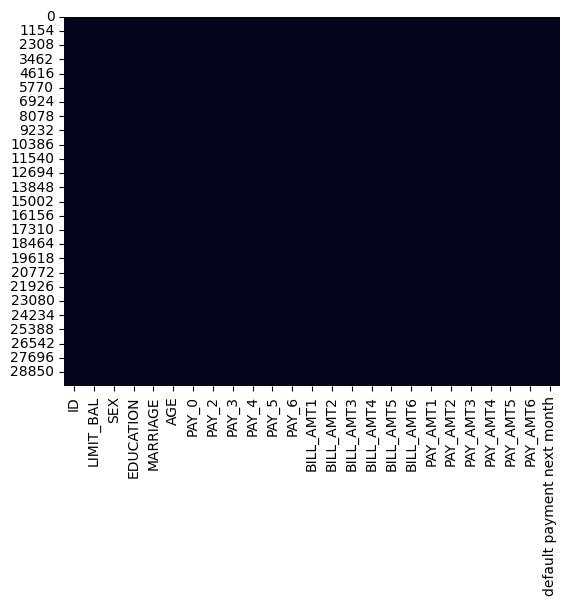

In [14]:
sns.heatmap(df.isnull(), cbar=False)

In [ ]:
df.describe()

# **Problem Statement**


### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments

# **Lets Begin !**

**Exploratory Data Analysis**

*   Dependent Feature
*   Independent Features



## **Dependent Variable:**

In [15]:
df.rename(columns={'default payment next month': 'IsDefaulter'}, inplace=True)
df.head(0)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter


<Axes: xlabel='IsDefaulter', ylabel='count'>

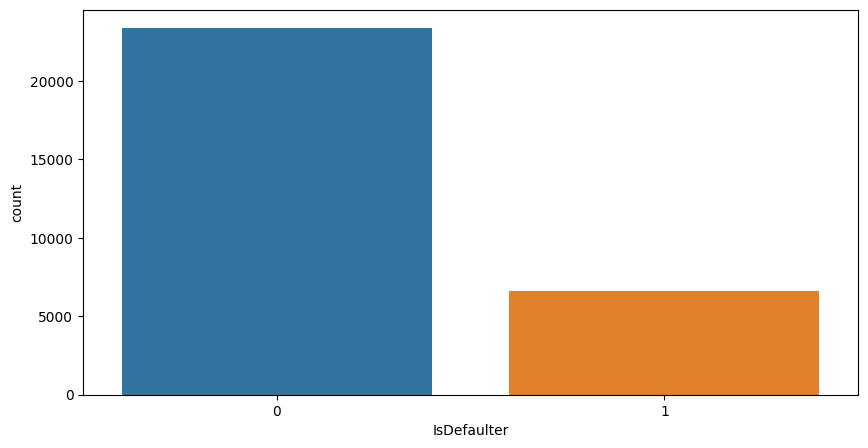

In [16]:
plt.figure(figsize=(10,5))
sns.countplot(x = 'IsDefaulter', data = df)

In [ ]:
df['IsDefaulter'].value_counts()

0    23364
1     6636
Name: IsDefaulter, dtype: int64

As we can see from above graph that both classes are not in proportion and we have imbalanced dataset.

## **Independent Variables:**

### **Categorical  Features**


We have few categorical features in our dataset. Let'Check how they are related with out target class.

**SEX**



*   1 - Male
*   2 - Female


In [17]:
df['SEX'].value_counts()

2    18112
1    11888
Name: SEX, dtype: int64

**Education**



> 1 = graduate school; 2 = university; 3 = high school; 4,5,6,0 = others

In [18]:
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64

As we can see in dataset we have values like 5,6,0 as well for which we are not having description so we can add up them in 4, which is Others.

In [19]:
fil = (df['EDUCATION'] == 5) | (df['EDUCATION'] == 6) | (df['EDUCATION'] == 0)
df.loc[fil, 'EDUCATION'] = 4
df['EDUCATION'].value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

**Marriage**


> 1 = married; 2 = single; 3 = others

In [20]:
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64

We have few values for 0, which are not determined . So I am adding them in Others category.

In [21]:
fil = df['MARRIAGE'] == 0
df.loc[fil, 'MARRIAGE'] = 3
df['MARRIAGE'].value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

**Plotting our categorical features**

In [22]:
categorical_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [23]:
df_cato = df[categorical_features]
df_cato['Defaulter'] = df['IsDefaulter']

In [ ]:
df_cato.head()

,SEX,EDUCATION,MARRIAGE,Defaulter
0,2,2,1,1
1,2,2,2,1
2,2,2,2,0
3,2,2,1,0
4,1,2,1,0


In [24]:
df_cato.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [25]:
df_cato.head()

,SEX,EDUCATION,MARRIAGE,Defaulter
0,FEMALE,university,married,1
1,FEMALE,university,single,1
2,FEMALE,university,single,0
3,FEMALE,university,married,0
4,MALE,university,married,0


<Figure size 1000x500 with 0 Axes>

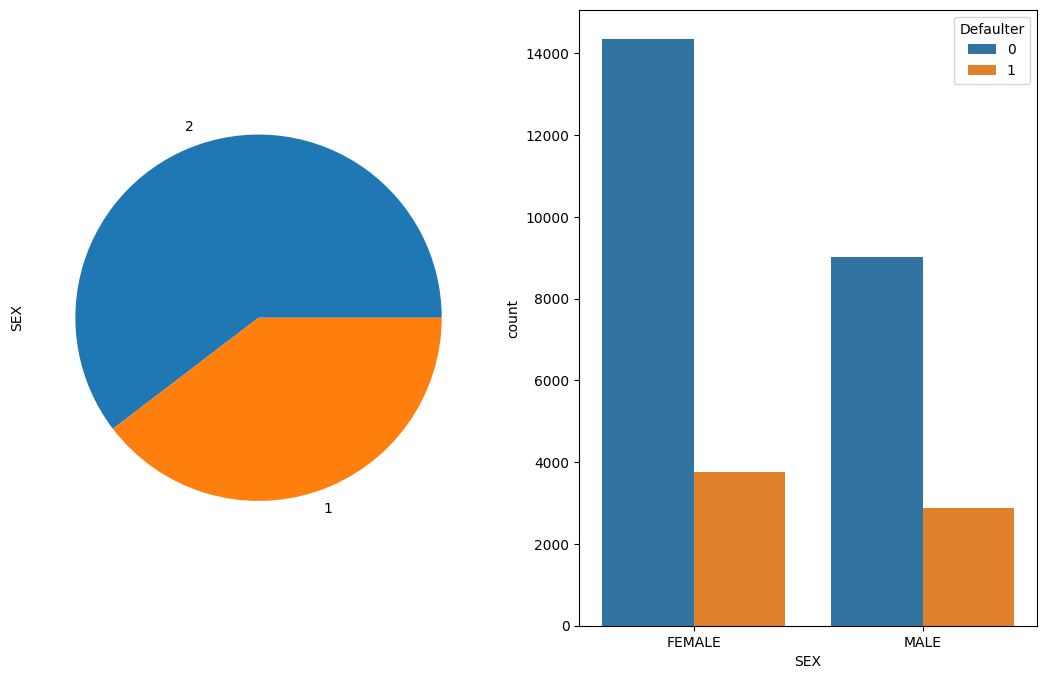

<Figure size 1000x500 with 0 Axes>

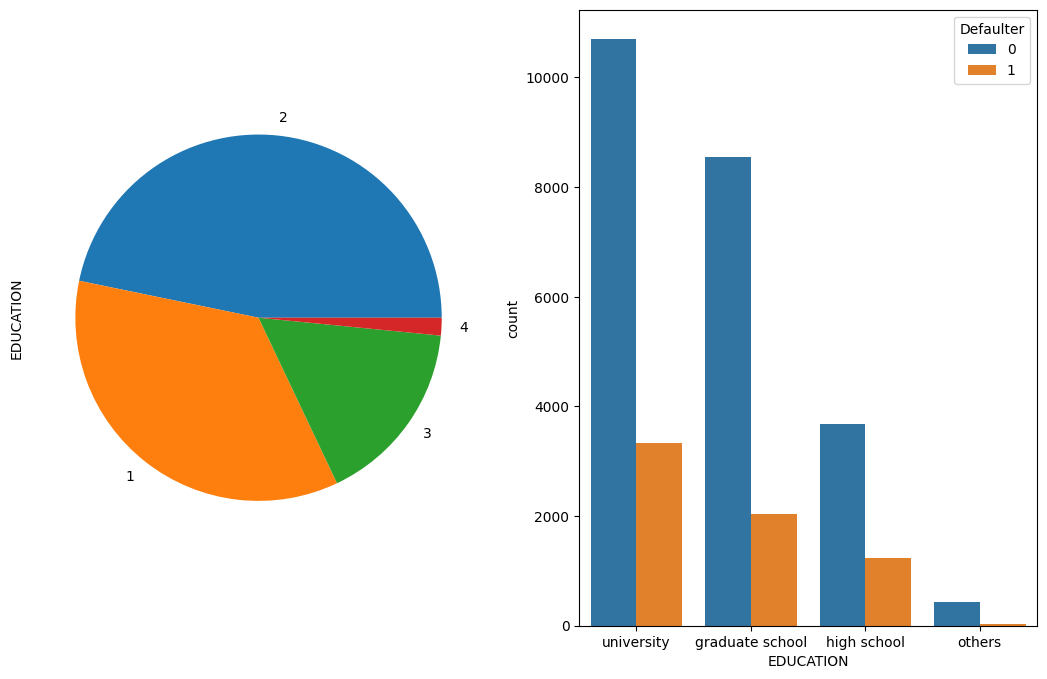

<Figure size 1000x500 with 0 Axes>

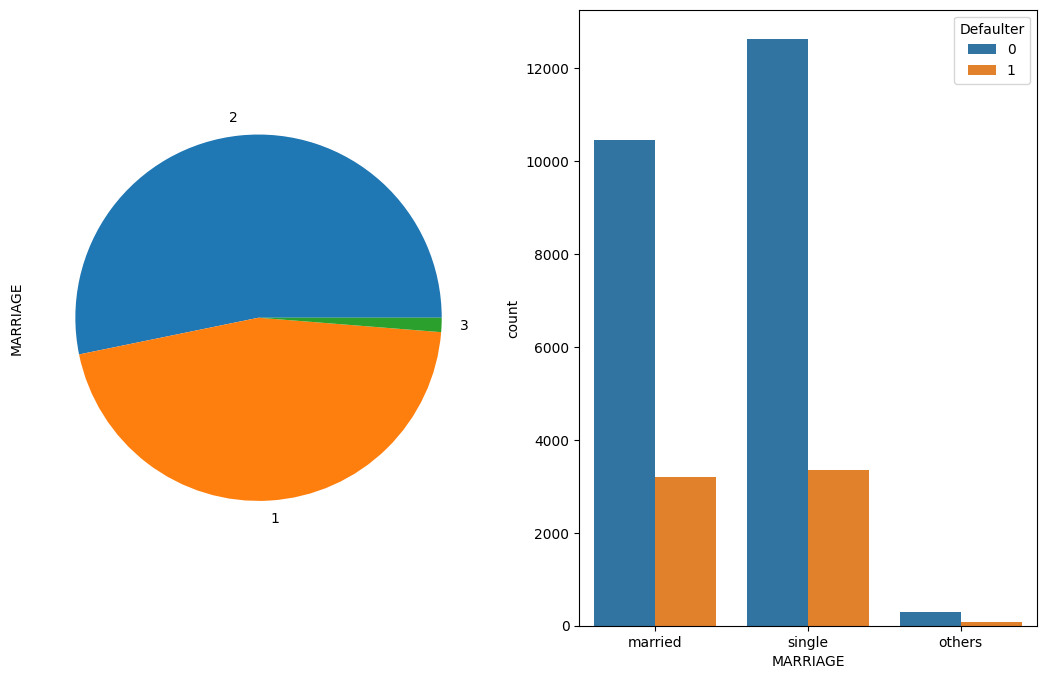

In [26]:
for col in categorical_features:
  plt.figure(figsize=(10,5))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
  sns.countplot(x = col, hue = 'Defaulter', data = df_cato)

Below are few observations for categorical features:




*   There are more females credit card holder,so no. of defaulter have high proportion of females.
*   No. of defaulters have a higher proportion of educated people  (graduate school and university)
*  No. of defaulters have a higher proportion of Singles.






**Limit Balance**

In [ ]:
df['LIMIT_BAL'].max()

1000000

In [ ]:
df['LIMIT_BAL'].min()

10000

In [ ]:
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

<Axes: xlabel='IsDefaulter', ylabel='LIMIT_BAL'>

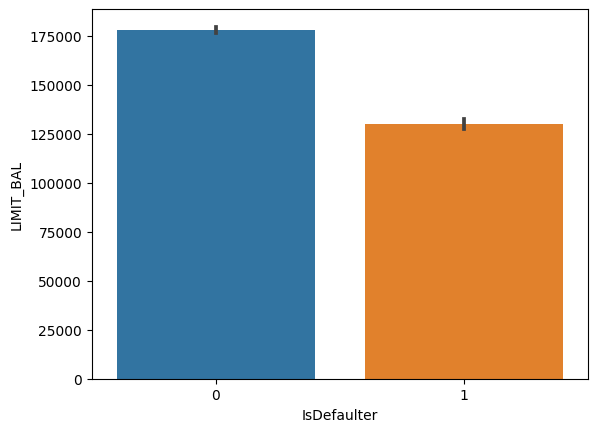

In [ ]:
sns.barplot(x='IsDefaulter', y='LIMIT_BAL', data=df)

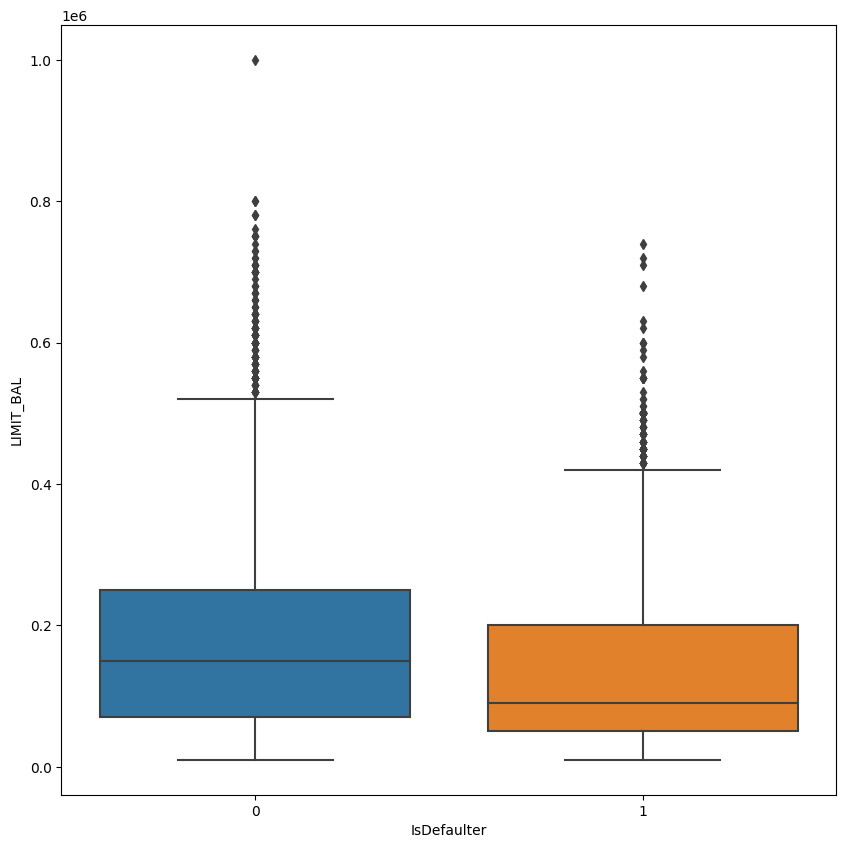

In [ ]:
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="LIMIT_BAL", data=df)

In [ ]:
#renaming columns

df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


**AGE**


Plotting graph of number of ages of all people with credit card irrespective of gender.

In [ ]:
df['AGE'].value_counts()


In [ ]:
df['AGE']=df['AGE'].astype('int')


<Axes: xlabel='index', ylabel='AGE'>

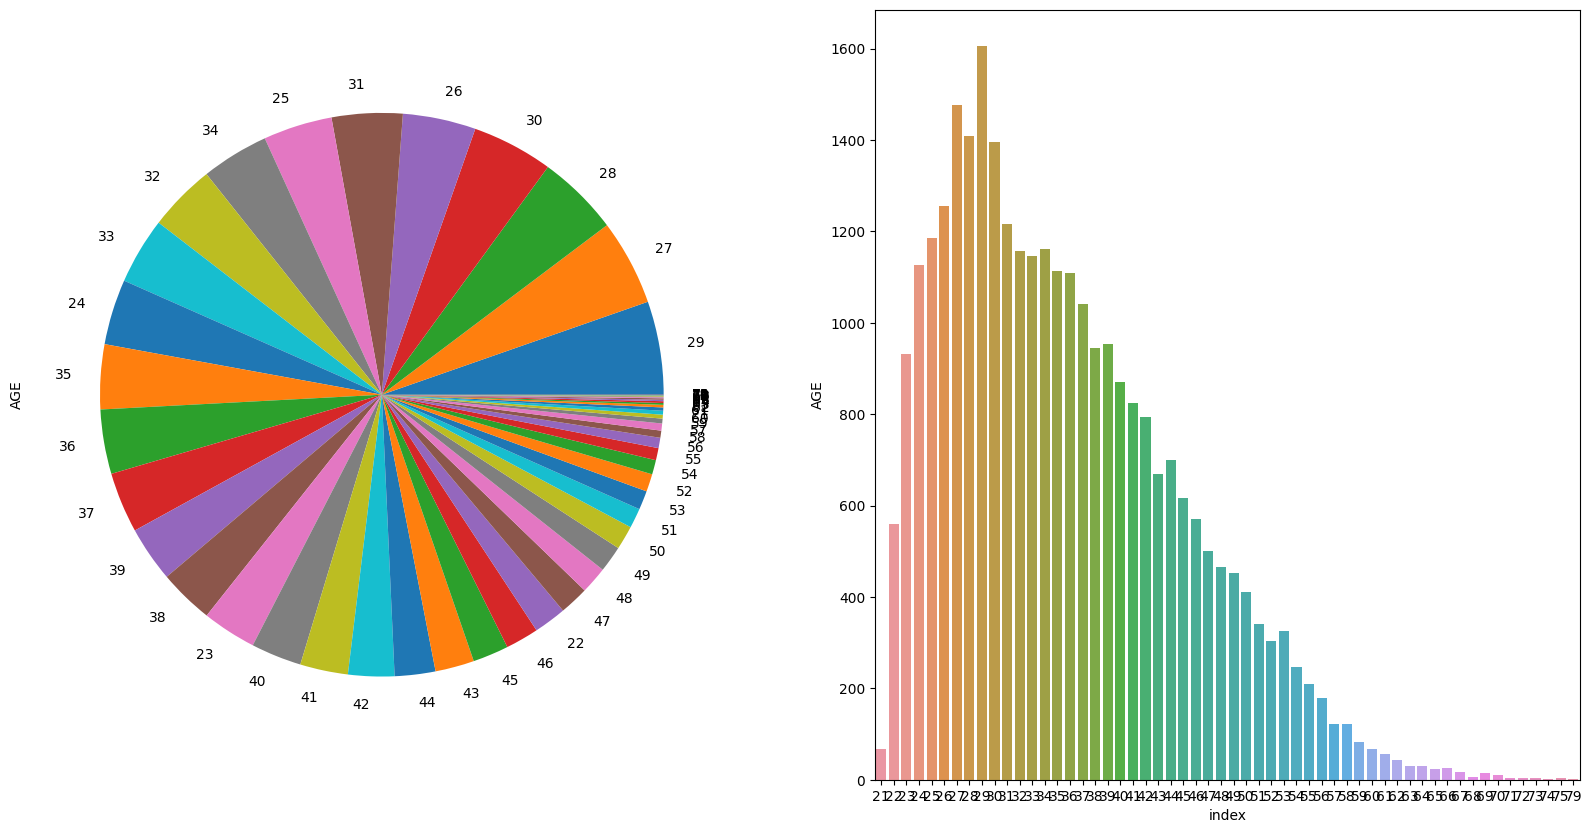

In [ ]:
fig, axes = plt.subplots(ncols=2,figsize=(20,10))
Day_df=df['AGE'].value_counts().reset_index()
df['AGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)
sns.barplot(x='index',y='AGE',data=Day_df,ax = axes[1],orient='v')

In [ ]:
df.groupby('IsDefaulter')['AGE'].mean()

IsDefaulter
0    35.417266
1    35.725738
Name: AGE, dtype: float64

In [ ]:
df = df.astype('int')


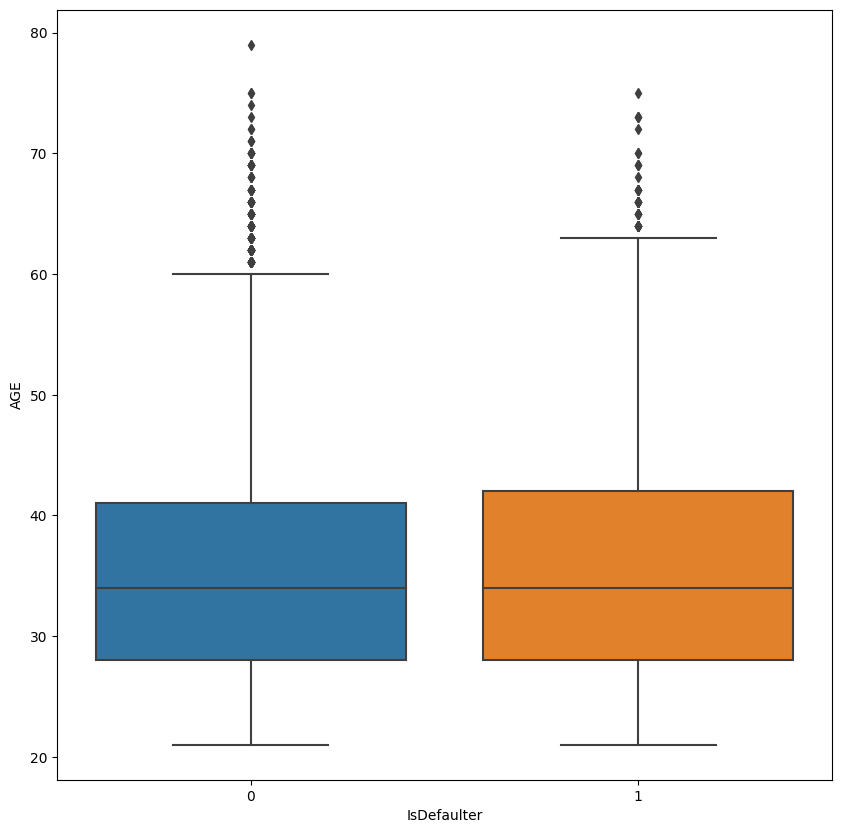

In [ ]:
plt.figure(figsize=(10,10))
ax =sns.boxplot(x="IsDefaulter", y="AGE", data=df)

**Bill Amount**

In [ ]:
bill_amnt_df = df[['BILL_AMT_SEPT', 'BILL_AMT_AUG', 'BILL_AMT_JUL', 'BILL_AMT_JUN', 'BILL_AMT_MAY', 'BILL_AMT_APR']]


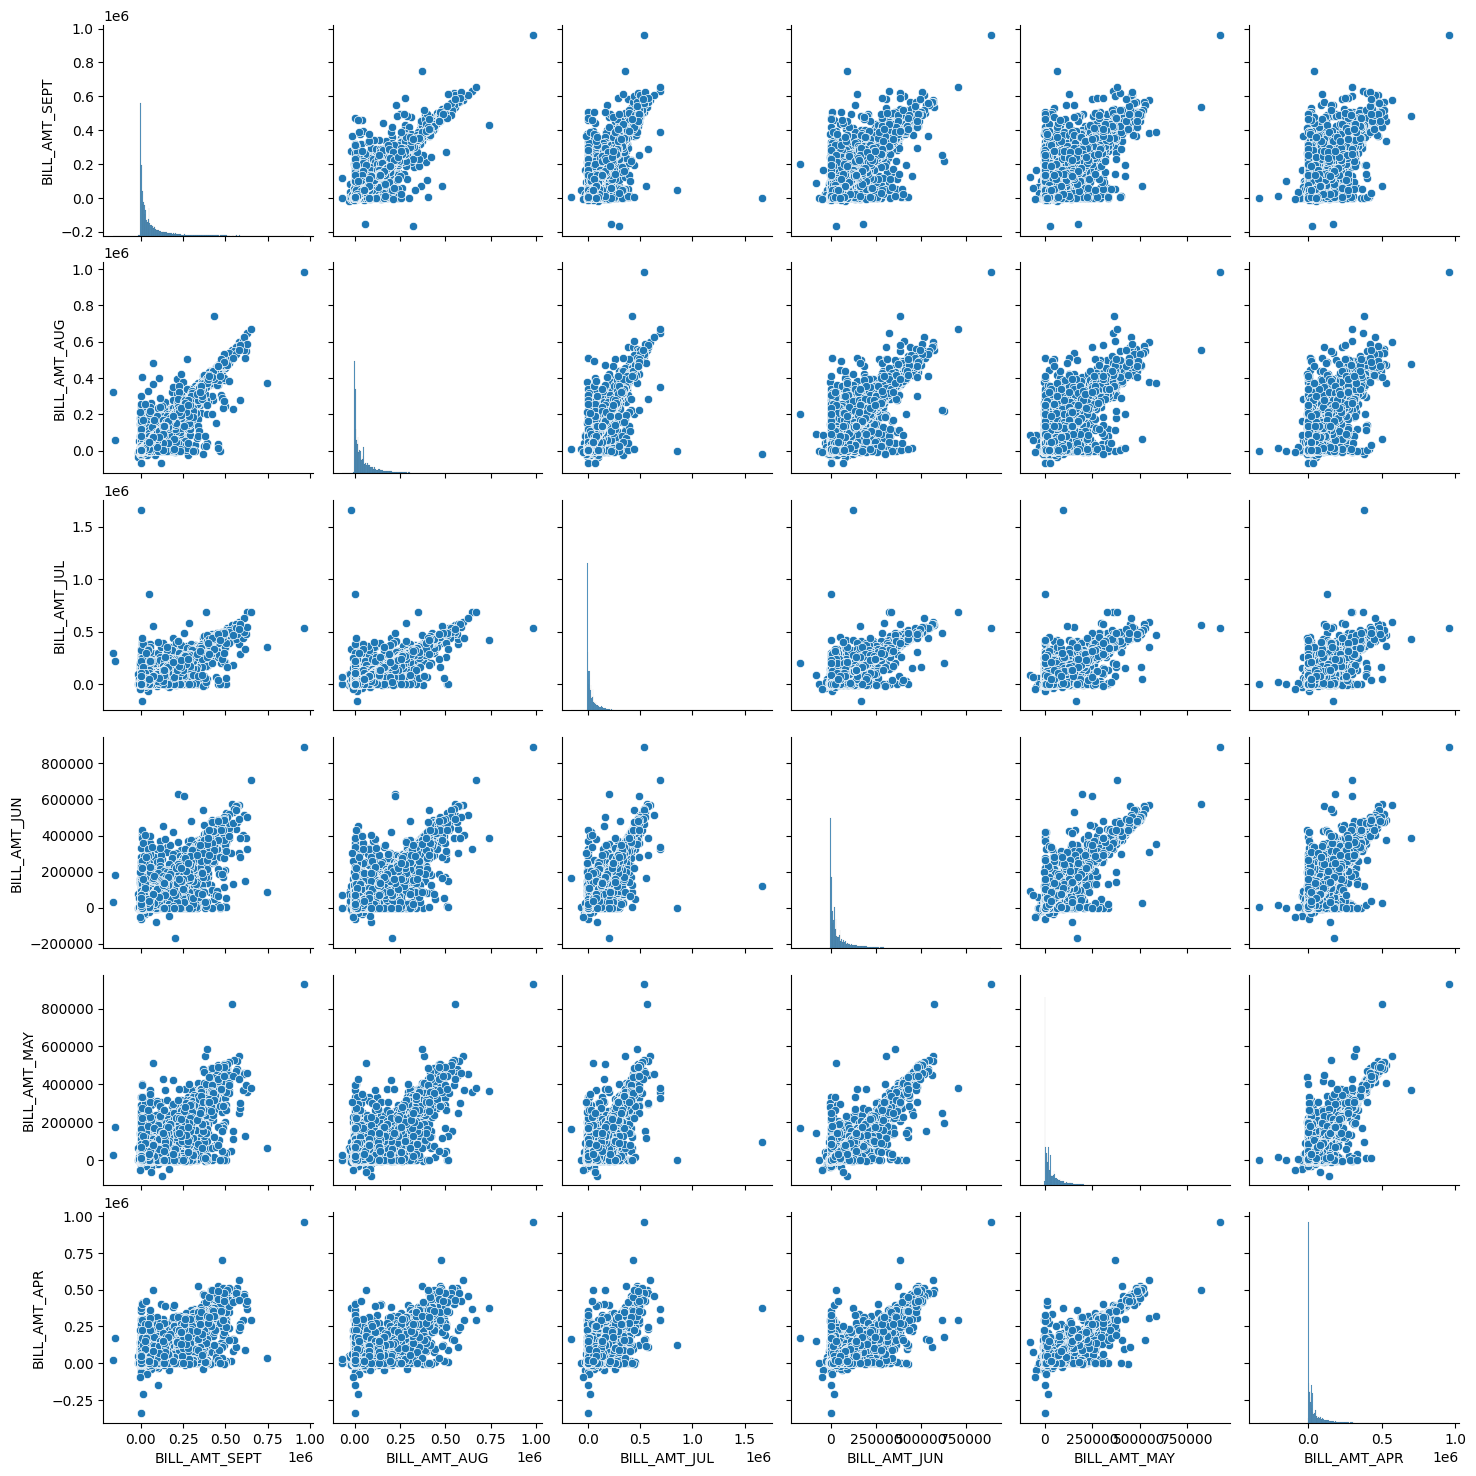

In [ ]:
sns.pairplot(data = bill_amnt_df)

**History payment status**


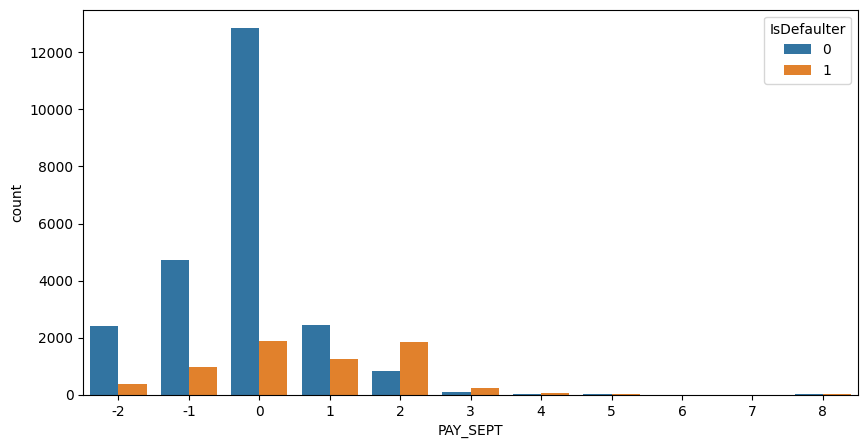

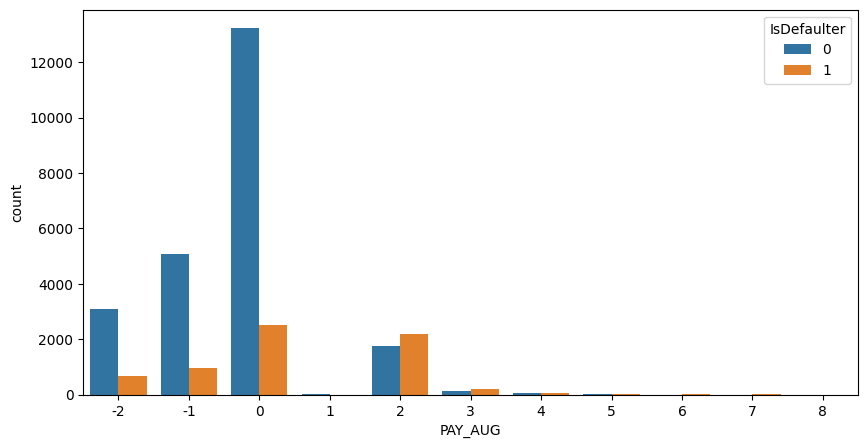

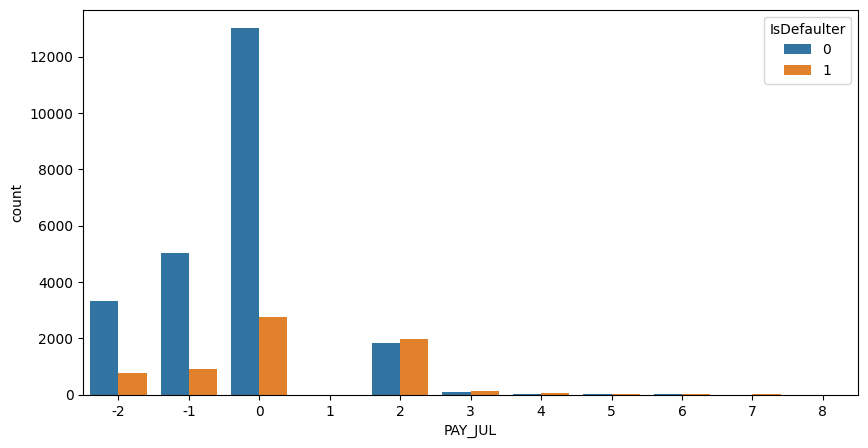

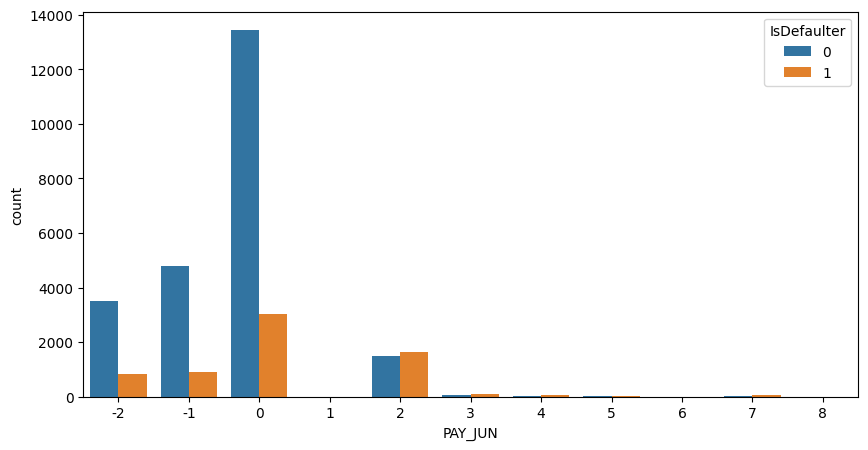

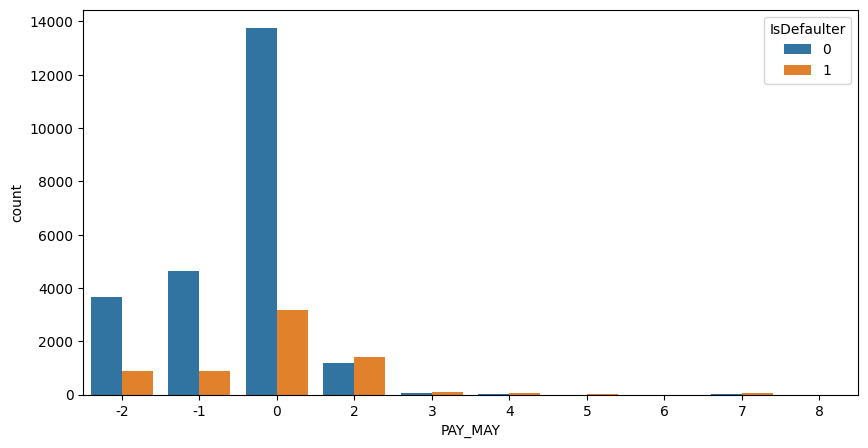

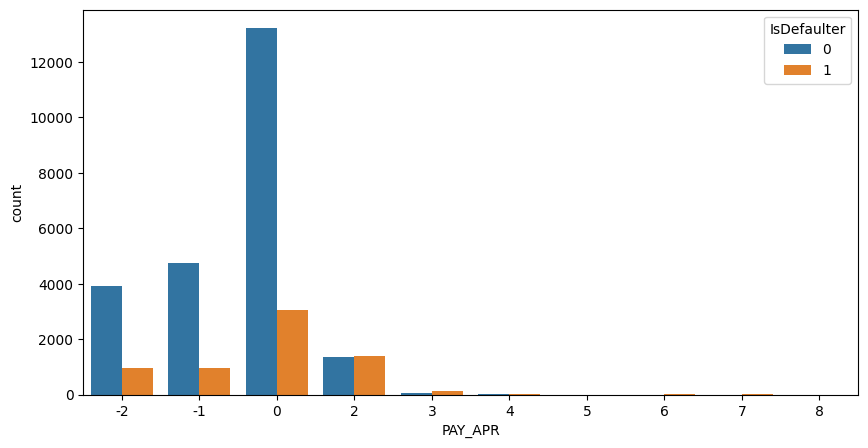

In [ ]:
pay_col = ['PAY_SEPT',  'PAY_AUG',  'PAY_JUL',  'PAY_JUN',  'PAY_MAY',  'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col,hue = 'IsDefaulter',  data = df)

**Paid Amount**


In [ ]:
pay_amnt_df = df[['PAY_AMT_SEPT',   'PAY_AMT_AUG',  'PAY_AMT_JUL',  'PAY_AMT_JUN',  'PAY_AMT_MAY',  'PAY_AMT_APR', 'IsDefaulter']]


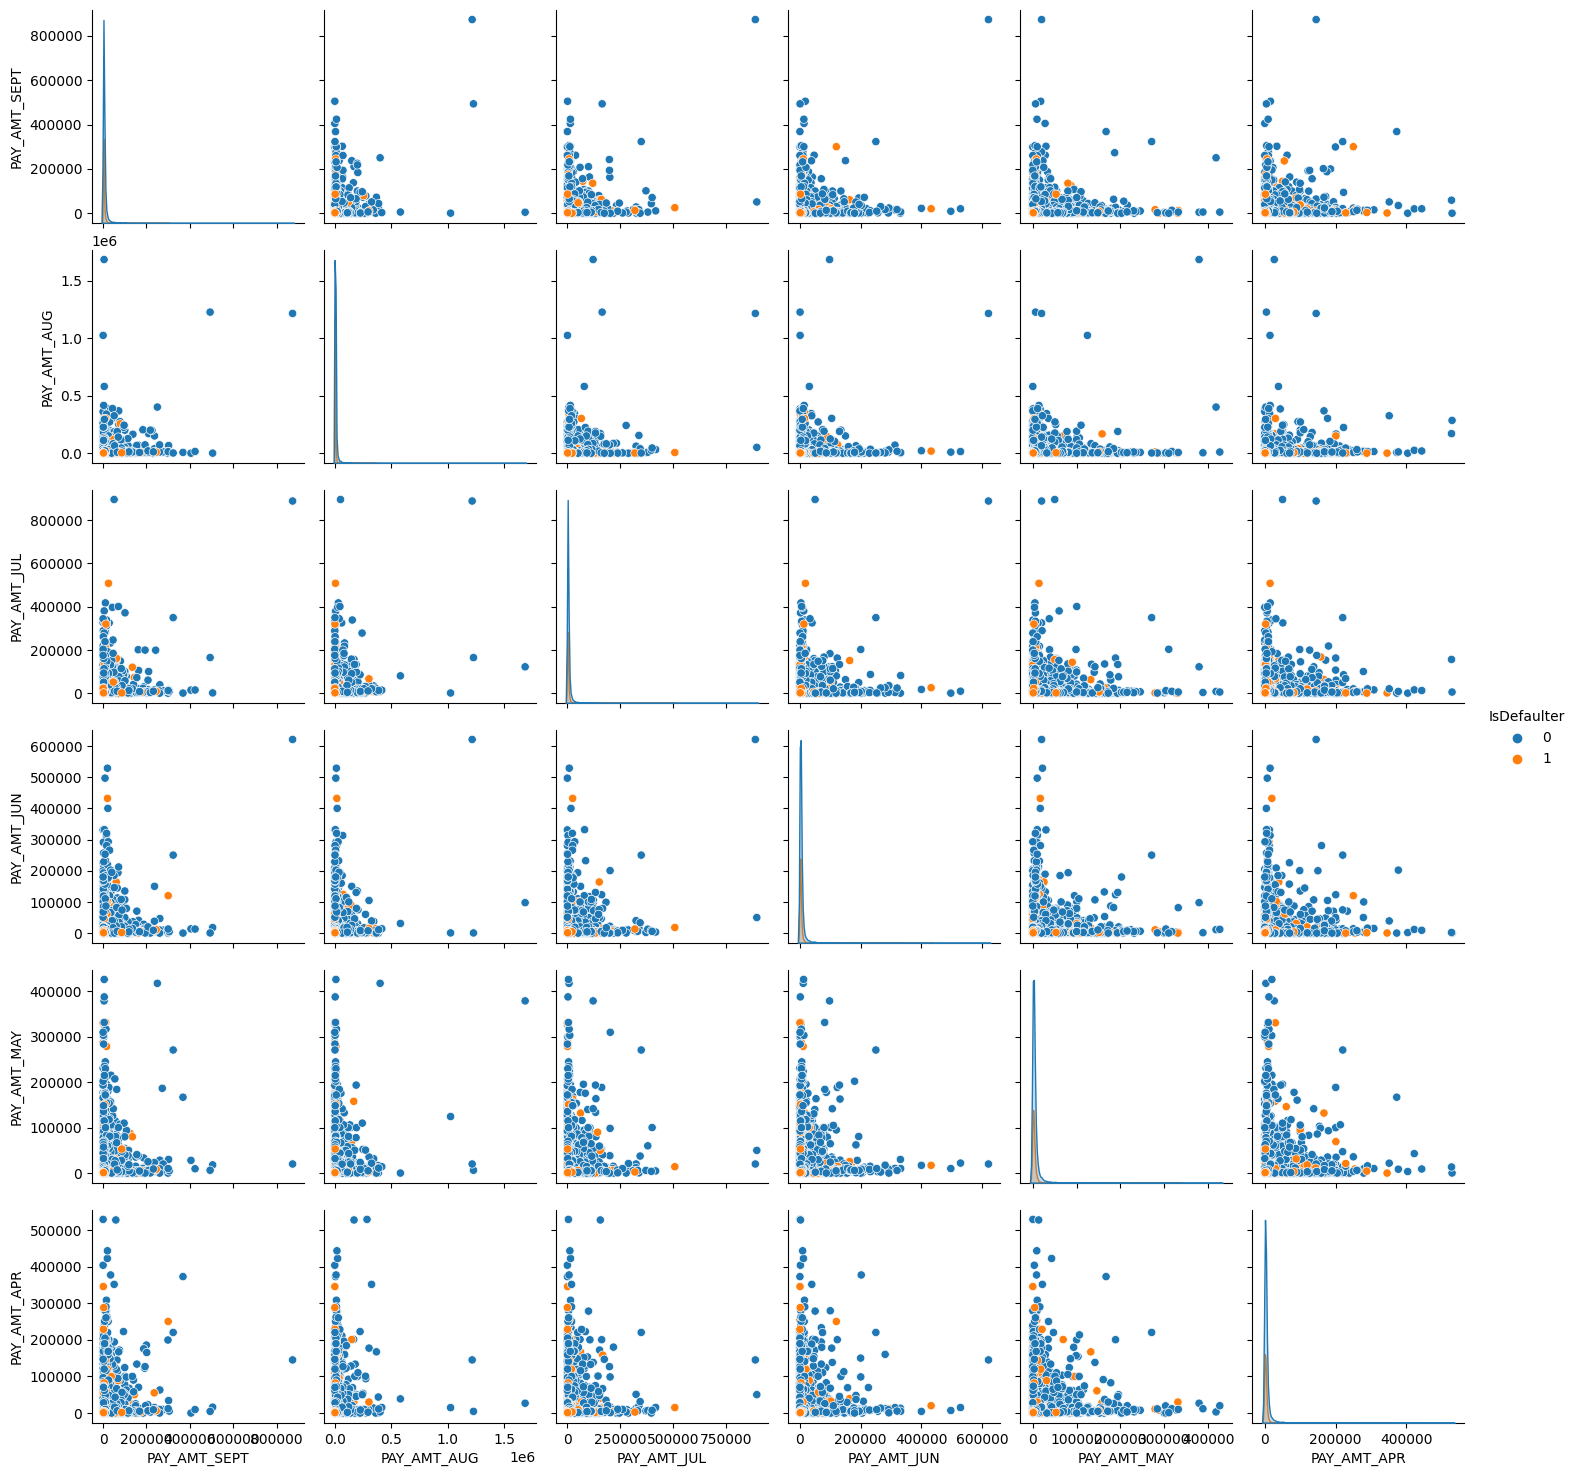

In [ ]:
sns.pairplot(data = pay_amnt_df, hue='IsDefaulter')


In [ ]:
df.shape


(30000, 25)

## <b>Correlation

Correlation is a statistical measure that indicates the extent to which two or more variables fluctuate in relation to each other. A positive correlation indicates the extent to which those variables increase or decrease in parallel; a negative correlation indicates the extent to which one variable increases as the other decreases

<Axes: >

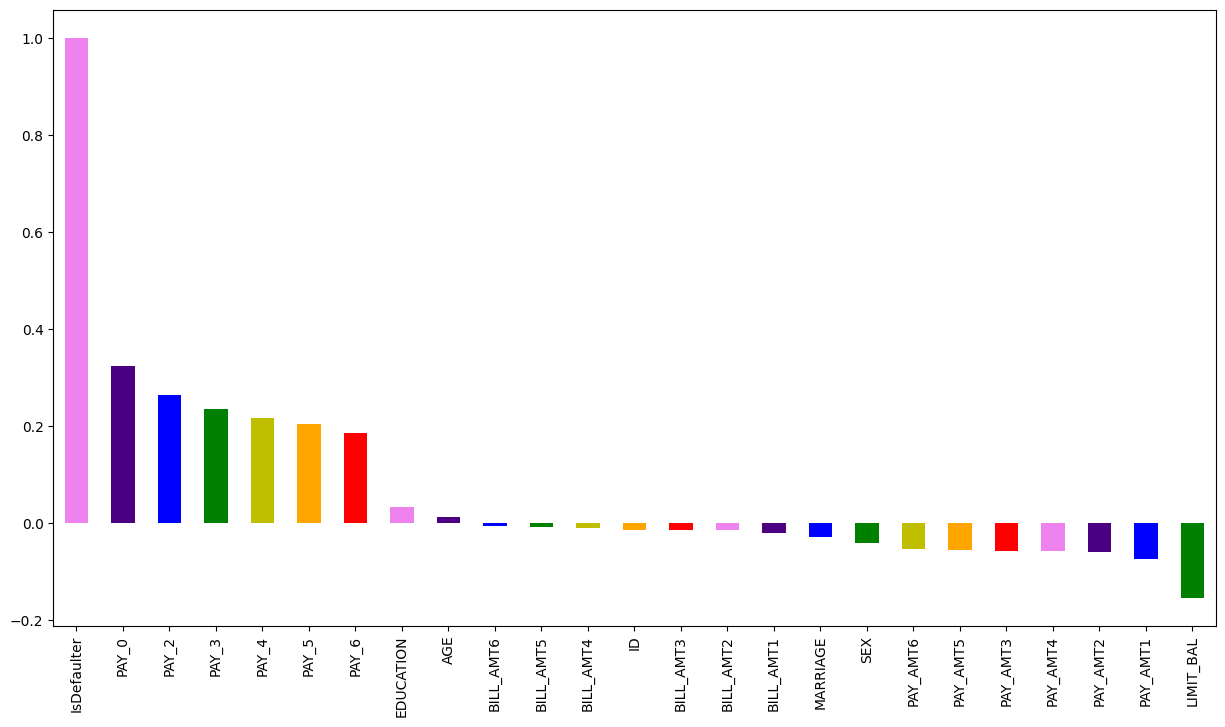

In [27]:
plt.figure(figsize=(15,8))
df.corr()['IsDefaulter'].sort_values(ascending = False).plot(kind='bar',color = ['violet','indigo','b','g','y','orange','r'])

Text(0.5, 1.0, 'Correlation Heatmap')

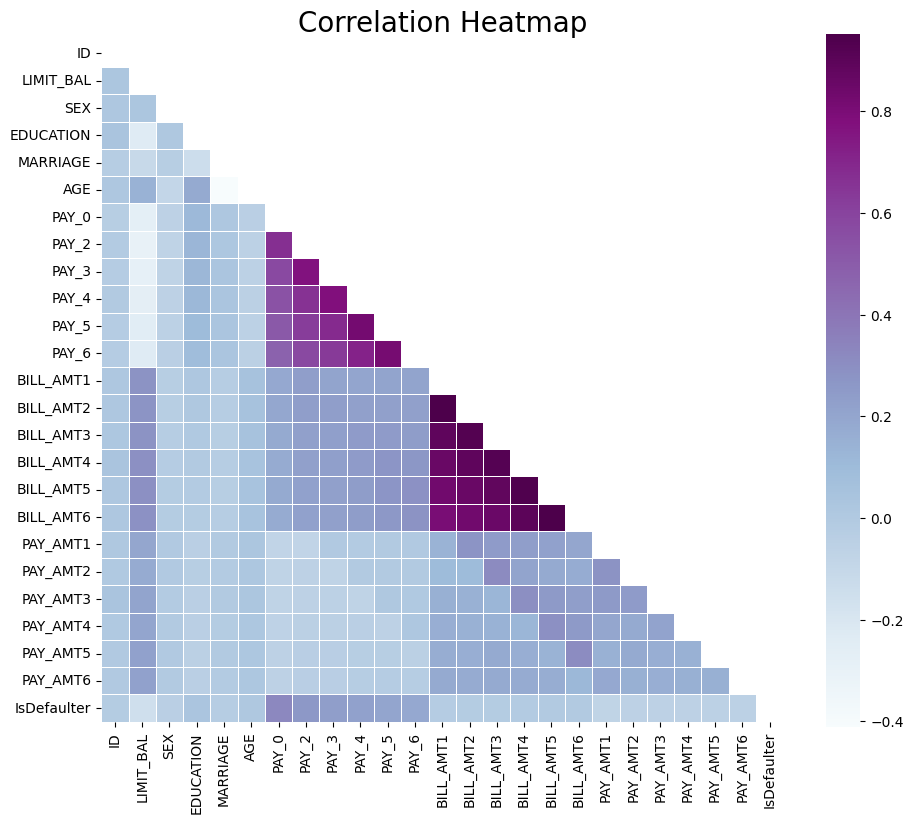

In [28]:
corr=df.corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize = (11, 9))
sns.heatmap(corr, mask = mask,
            square = True, linewidths = .5, ax = ax, cmap = "BuPu")
plt.title("Correlation Heatmap", fontsize=20)

<Axes: >

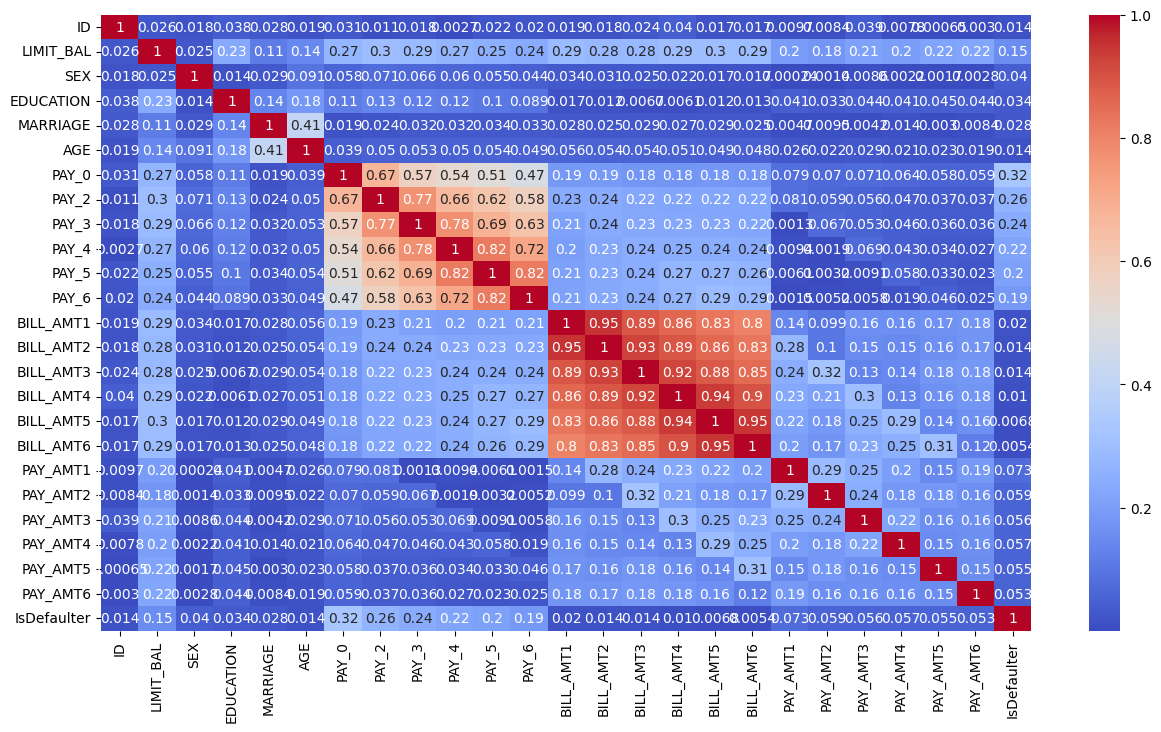

In [29]:
plt.figure(figsize=(15,8))
correlation=df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [30]:
corr = df.corr()
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
ID,1.00,0.03,0.02,0.04,-0.03,0.02,-0.03,-0.01,-0.02,-0.00,-0.02,-0.02,0.02,0.02,0.02,0.04,0.02,0.02,0.01,0.01,0.04,0.01,0.00,0.00,-0.01
LIMIT_BAL,0.03,1.00,0.02,-0.23,-0.11,0.14,-0.27,-0.30,-0.29,-0.27,-0.25,-0.24,0.29,0.28,0.28,0.29,0.30,0.29,0.20,0.18,0.21,0.20,0.22,0.22,-0.15
SEX,0.02,0.02,1.00,0.01,-0.03,-0.09,-0.06,-0.07,-0.07,-0.06,-0.06,-0.04,-0.03,-0.03,-0.02,-0.02,-0.02,-0.02,-0.00,-0.00,-0.01,-0.00,-0.00,-0.00,-0.04
EDUCATION,0.04,-0.23,0.01,1.00,-0.14,0.18,0.11,0.13,0.12,0.12,0.10,0.09,0.02,0.01,0.01,-0.01,-0.01,-0.01,-0.04,-0.03,-0.04,-0.04,-0.05,-0.04,0.03
MARRIAGE,-0.03,-0.11,-0.03,-0.14,1.00,-0.41,0.02,0.02,0.03,0.03,0.03,0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.03,-0.00,-0.01,-0.00,-0.01,-0.00,-0.01,-0.03
AGE,0.02,0.14,-0.09,0.18,-0.41,1.00,-0.04,-0.05,-0.05,-0.05,-0.05,-0.05,0.06,0.05,0.05,0.05,0.05,0.05,0.03,0.02,0.03,0.02,0.02,0.02,0.01
PAY_0,-0.03,-0.27,-0.06,0.11,0.02,-0.04,1.00,0.67,0.57,0.54,0.51,0.47,0.19,0.19,0.18,0.18,0.18,0.18,-0.08,-0.07,-0.07,-0.06,-0.06,-0.06,0.32
PAY_2,-0.01,-0.30,-0.07,0.13,0.02,-0.05,0.67,1.00,0.77,0.66,0.62,0.58,0.23,0.24,0.22,0.22,0.22,0.22,-0.08,-0.06,-0.06,-0.05,-0.04,-0.04,0.26
PAY_3,-0.02,-0.29,-0.07,0.12,0.03,-0.05,0.57,0.77,1.00,0.78,0.69,0.63,0.21,0.24,0.23,0.23,0.23,0.22,0.00,-0.07,-0.05,-0.05,-0.04,-0.04,0.24
PAY_4,-0.00,-0.27,-0.06,0.12,0.03,-0.05,0.54,0.66,0.78,1.00,0.82,0.72,0.20,0.23,0.24,0.25,0.24,0.24,-0.01,-0.00,-0.07,-0.04,-0.03,-0.03,0.22


#### **As we have seen earlier that we have imbalanced dataset. So to remediate Imbalance we are using SMOTE(Synthetic Minority Oversampling Technique)**

* SMOTE (synthetic minority oversampling technique) is one of the most commonly used oversampling methods to solve the imbalance problem

In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(df.iloc[:,0:-1], df['IsDefaulter'])

print('Original dataset shape', len(df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 30000
Resampled dataset shape 46728


In [32]:
x_smote


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,7955,50000,1,2,1,47,1,0,0,0,...,50298,19857,20218,19045,3000,1734,945,1000,976,1000
46724,22325,20000,2,2,2,28,0,0,0,0,...,178,178,178,178,0,0,0,0,0,0
46725,27331,41123,1,3,2,42,0,0,0,0,...,33314,0,0,0,1902,1000,0,0,0,0
46726,26824,20000,1,2,2,24,0,0,0,0,...,7754,9503,9532,10524,1640,1251,2180,501,1584,1928


In [33]:
 y_smote.shape


(46728,)

In [39]:
columns = list(df.columns)


In [40]:
columns.pop()


'IsDefaulter'

In [41]:
balance_df = pd.DataFrame(x_smote, columns=columns)
balance_df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,7955,50000,1,2,1,47,1,0,0,0,...,50298,19857,20218,19045,3000,1734,945,1000,976,1000
46724,22325,20000,2,2,2,28,0,0,0,0,...,178,178,178,178,0,0,0,0,0,0
46725,27331,41123,1,3,2,42,0,0,0,0,...,33314,0,0,0,1902,1000,0,0,0,0
46726,26824,20000,1,2,2,24,0,0,0,0,...,7754,9503,9532,10524,1640,1251,2180,501,1584,1928


In [42]:
balance_df['IsDefaulter'] = y_smote

In [43]:
balance_df[balance_df['IsDefaulter']==1]


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,7955,50000,1,2,1,47,1,0,0,0,...,19857,20218,19045,3000,1734,945,1000,976,1000,1
46724,22325,20000,2,2,2,28,0,0,0,0,...,178,178,178,0,0,0,0,0,0,1
46725,27331,41123,1,3,2,42,0,0,0,0,...,0,0,0,1902,1000,0,0,0,0,1
46726,26824,20000,1,2,2,24,0,0,0,0,...,9503,9532,10524,1640,1251,2180,501,1584,1928,1


## **Feature Engineering**

* Feature engineering involves a set of techniques that enable us to **create new features by combining** or **transforming** the existing ones.

In [64]:
df_fr = balance_df.copy()

In [ ]:
df_fr['Payement_Value'] = df_fr['PAY_SEPT'] + df_fr['PAY_AUG'] + df_fr['PAY_JUL'] + df_fr['PAY_JUN'] + df_fr['PAY_MAY'] + df_fr['PAY_APR']


In [65]:
df_fr

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,7955,50000,1,2,1,47,1,0,0,0,...,19857,20218,19045,3000,1734,945,1000,976,1000,1
46724,22325,20000,2,2,2,28,0,0,0,0,...,178,178,178,0,0,0,0,0,0,1
46725,27331,41123,1,3,2,42,0,0,0,0,...,0,0,0,1902,1000,0,0,0,0,1
46726,26824,20000,1,2,2,24,0,0,0,0,...,9503,9532,10524,1640,1251,2180,501,1584,1928,1


In [ ]:
df_fr.groupby('IsDefaulter')['Payement_Value'].mean()


<Axes: xlabel='IsDefaulter', ylabel='Payement_Value'>

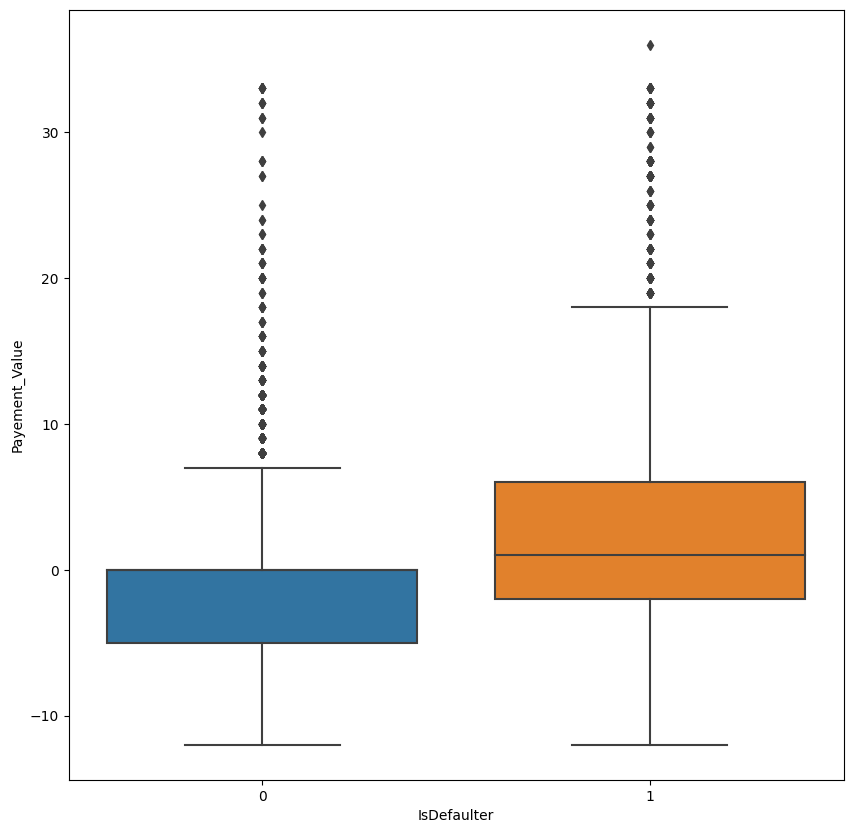

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(data = df_fr, x = 'IsDefaulter', y = 'Payement_Value' )

In [ ]:
df_fr['Dues'] = (df_fr['BILL_AMT_APR']+df_fr['BILL_AMT_MAY']+df_fr['BILL_AMT_JUN']+df_fr['BILL_AMT_JUL']+ df_fr['BILL_AMT_AUG'] +df_fr['BILL_AMT_SEPT'])-(df_fr['PAY_AMT_APR']+df_fr['PAY_AMT_MAY']+df_fr['PAY_AMT_JUN']+df_fr['PAY_AMT_JUL']+df_fr['PAY_AMT_AUG']+df_fr['PAY_AMT_SEPT'])


In [ ]:
df_fr

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payement_Value,Dues
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,7015
1,2,120000,2,2,2,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,12077
2,3,90000,2,2,2,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,90635
3,4,50000,2,2,1,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,222946
4,5,50000,1,2,1,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,50290
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46723,9664,20000,1,1,2,35,0,2,2,-1,...,9234,0,0,8491,497,985,453,1,3,49111
46724,8919,130000,2,1,2,28,-1,-1,-1,-1,...,360,8041,86,0,1155,0,1107,1,-4,9714
46725,15072,180000,2,1,1,41,0,0,-1,-1,...,140,0,140,140,140,140,140,1,-4,693
46726,10861,50000,2,1,1,34,1,0,0,0,...,7644,2127,1469,1530,1531,3251,865,1,1,118408


In [ ]:
df_fr.groupby('IsDefaulter')['Dues'].mean()


IsDefaulter
0    237459.487203
1    240243.893511
Name: Dues, dtype: float64

In [49]:
df_fr['EDUCATION'].unique()


array([2, 1, 3, 4])

In [50]:

df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 6, 4, df_fr['EDUCATION'])
df_fr['EDUCATION']=np.where(df_fr['EDUCATION'] == 0, 4, df_fr['EDUCATION'])

In [51]:
df_fr['MARRIAGE'].unique()


array([1, 2, 3])

In [52]:
df_fr['MARRIAGE']=np.where(df_fr['MARRIAGE'] == 0, 3, df_fr['MARRIAGE'])

In [53]:
df_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [ ]:
df_fr.head()


## **One Hot Encoding**

* One hot encoding is one method of converting data to prepare it for an algorithm and get a better prediction. With one-hot, we convert each categorical value into a new categorical column and assign a binary value of 1 or 0 to those columns.

In [55]:
df_fr = pd.get_dummies(df_fr,columns=['EDUCATION','MARRIAGE'])

In [56]:
df_fr.head()


,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT5,PAY_AMT6,IsDefaulter,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,FEMALE,24,2,2,-1,-1,-2,-2,...,0,0,1,0,0,0,1,1,0,0
1,2,120000,FEMALE,26,-1,2,0,0,0,2,...,0,2000,1,0,0,0,1,0,0,1
2,3,90000,FEMALE,34,0,0,0,0,0,0,...,1000,5000,0,0,0,0,1,0,0,1
3,4,50000,FEMALE,37,0,0,0,0,0,0,...,1069,1000,0,0,0,0,1,1,0,0
4,5,50000,MALE,57,-1,0,-1,0,0,0,...,689,679,0,0,0,0,1,1,0,0


In [57]:
df_fr.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)


In [59]:
df_fr.head()


,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,MARRIAGE_married,MARRIAGE_single
0,1,20000,FEMALE,24,2,2,-1,-1,-2,-2,...,0,0,0,0,1,0,0,1,1,0
1,2,120000,FEMALE,26,-1,2,0,0,0,2,...,1000,1000,0,2000,1,0,0,1,0,1
2,3,90000,FEMALE,34,0,0,0,0,0,0,...,1000,1000,1000,5000,0,0,0,1,0,1
3,4,50000,FEMALE,37,0,0,0,0,0,0,...,1200,1100,1069,1000,0,0,0,1,1,0
4,5,50000,MALE,57,-1,0,-1,0,0,0,...,10000,9000,689,679,0,0,0,1,1,0


In [60]:
# LABEL ENCODING FOR SEX
encoders_nums = {
                 "SEX":{"FEMALE": 0, "MALE": 1}
}
df_fr = df_fr.replace(encoders_nums)

In [61]:
df_fr.head()


,ID,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,MARRIAGE_married,MARRIAGE_single
0,1,20000,0,24,2,2,-1,-1,-2,-2,...,0,0,0,0,1,0,0,1,1,0
1,2,120000,0,26,-1,2,0,0,0,2,...,1000,1000,0,2000,1,0,0,1,0,1
2,3,90000,0,34,0,0,0,0,0,0,...,1000,1000,1000,5000,0,0,0,1,0,1
3,4,50000,0,37,0,0,0,0,0,0,...,1200,1100,1069,1000,0,0,0,1,1,0
4,5,50000,1,57,-1,0,-1,0,0,0,...,10000,9000,689,679,0,0,0,1,1,0


In [62]:
df_fr.drop('ID',axis = 1, inplace = True)


In [63]:
df_fr.head()


,LIMIT_BAL,SEX,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_university,MARRIAGE_married,MARRIAGE_single
0,20000,0,24,2,2,-1,-1,-2,-2,3913,...,0,0,0,0,1,0,0,1,1,0
1,120000,0,26,-1,2,0,0,0,2,2682,...,1000,1000,0,2000,1,0,0,1,0,1
2,90000,0,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,0,0,0,1,0,1
3,50000,0,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,0,0,0,1,1,0
4,50000,1,57,-1,0,-1,0,0,0,8617,...,10000,9000,689,679,0,0,0,1,1,0


# **Implementing Logistic Regression**

* Logistic Regression is one of the simplest algorithms which estimates the relationship between one dependent binary variable and independent variables, computing the probability of occurrence of an event. The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of C, the power of regulation is reduced and the model increases its complexity, thus overfitting the data.

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

In [67]:
df_log_reg = df_fr.copy()


In [71]:
df_log_reg.head()


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [73]:
X = df_log_reg.drop(['IsDefaulter'],axis=1)
y = df_log_reg['IsDefaulter']

In [74]:
columns = X.columns
columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [75]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)


In [77]:
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }


In [79]:
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [80]:
optimized_clf = grid_lr_clf.best_estimator_


In [81]:
grid_lr_clf.best_params_


{'C': 1, 'penalty': 'l2'}

In [82]:
grid_lr_clf.best_score_


0.7239275463914824

In [163]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [84]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [85]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7247580413326093
The accuracy on test data is  0.7240775565786914


In [86]:
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7240775565786914
The precision on test data is  0.7286640726329442
The recall on test data is  0.7220151651458682
The f1 on test data is  0.7253243818991674
The roc_score on test data is  0.7240965878085361


[[11351  4302]
 [ 4315 11339]]


[Text(0, 0.5, 'Non-Defaulter'), Text(0, 1.5, 'Defaulter')]

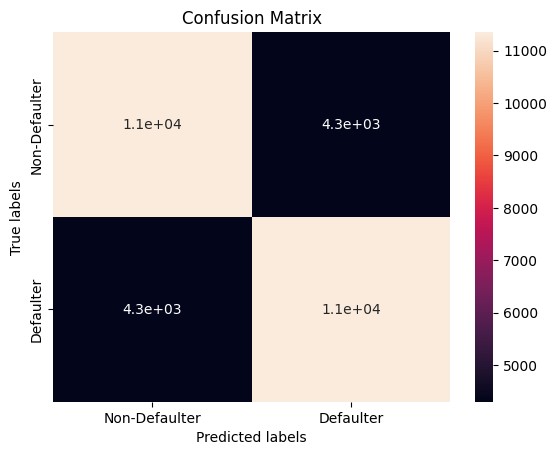

In [87]:
# Get the confusion matrix for both train and test

labels = ['Non-Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [88]:
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })


In [89]:
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]


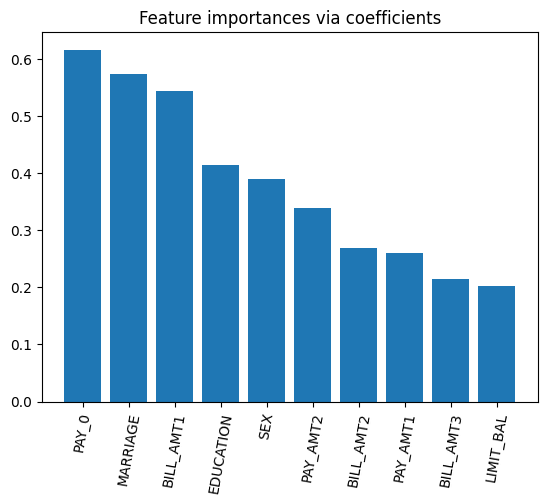

In [90]:

plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [91]:
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]


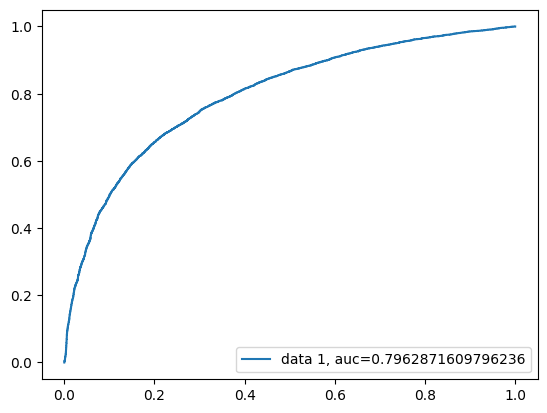

In [92]:
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

I have implemented logistic regression and I am getting f1-sore approx 73%. As I have imbalanced dataset, F1- score is better parameter. Let's go ahead with other models and see if they can yield better result.

# **Implementing Decision Tree**

* Decision Tree is another very popular algorithm for classification problems because it is easy to interpret and understand. An internal node represents a feature, the branch represents a decision rule, and each leaf node represents the outcome. Some advantages of decision trees are that they require less data preprocessing, i.e., no need to normalize features. However, noisy data can be easily overfitted and results in biased results when the data set is imbalanced.

In [93]:
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}


In [94]:
from sklearn.tree import DecisionTreeClassifier


In [97]:
X = df_fr.drop(['IsDefaulter'],axis=1)
y = df_fr['IsDefaulter']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)


In [99]:
grid_DTC_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_DTC_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [100]:
grid_DTC_clf.best_score_


0.7193278044516699

In [101]:
optimal_DTC_clf = grid_DTC_clf.best_estimator_
optimal_DTC_clf

DecisionTreeClassifier(max_depth=20, min_samples_split=0.1)

In [102]:
# Get the predicted classes
train_class_preds = optimal_DTC_clf.predict(X_train)
test_class_preds = optimal_DTC_clf.predict(X_test)

In [103]:
grid_DTC_clf.best_params_


{'max_depth': 20, 'min_samples_split': 0.1}

In [104]:
# Get the accuracy scores
train_accuracy_DTC = accuracy_score(train_class_preds,y_train)
test_accuracy_DTC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_DTC)
print("The accuracy on test data is ", test_accuracy_DTC)

The accuracy on train data is  0.7265787204139649
The accuracy on test data is  0.718306205823228


# **Implementing RandomForest**

* Random forests or random decision forests is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of decision trees at training time.

In [105]:
from sklearn.ensemble import RandomForestClassifier


In [108]:
X = df_fr.drop(['IsDefaulter'],axis=1)
y = df_fr['IsDefaulter']

In [109]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [110]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [111]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  1.0
The accuracy on test data is  0.8430062901238571


In [112]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8430062901238571
The precision on test data is  0.8238651102464332
The recall on test data is  0.8566419420094403
The f1 on test data is  0.8399338842975207
The roc_score on test data is  0.8435095795483125


**I can see from above results that I am getting  around 99% train accuracy and 83% for test accuracy which depicts that model is overfitting. However our f1-score is around 82%, which is not bad.**

In [113]:
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}


In [114]:
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [115]:
grid_rf_clf.best_score_


0.8266202973758903

In [116]:
grid_rf_clf.best_params_


{'max_depth': 30, 'n_estimators': 200}

In [117]:
optimal_rf_clf = grid_rf_clf.best_estimator_
optimal_rf_clf

RandomForestClassifier(max_depth=30, n_estimators=200)

In [118]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [119]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  1.0
The accuracy on test data is  0.842617210297646


In [120]:
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.842617210297646
The precision on test data is  0.8232166018158236
The recall on test data is  0.8564296316286601
The f1 on test data is  0.8394947424112162
The roc_score on test data is  0.8431336672500355


In [121]:
len(optimal_rf_clf.feature_importances_)

24

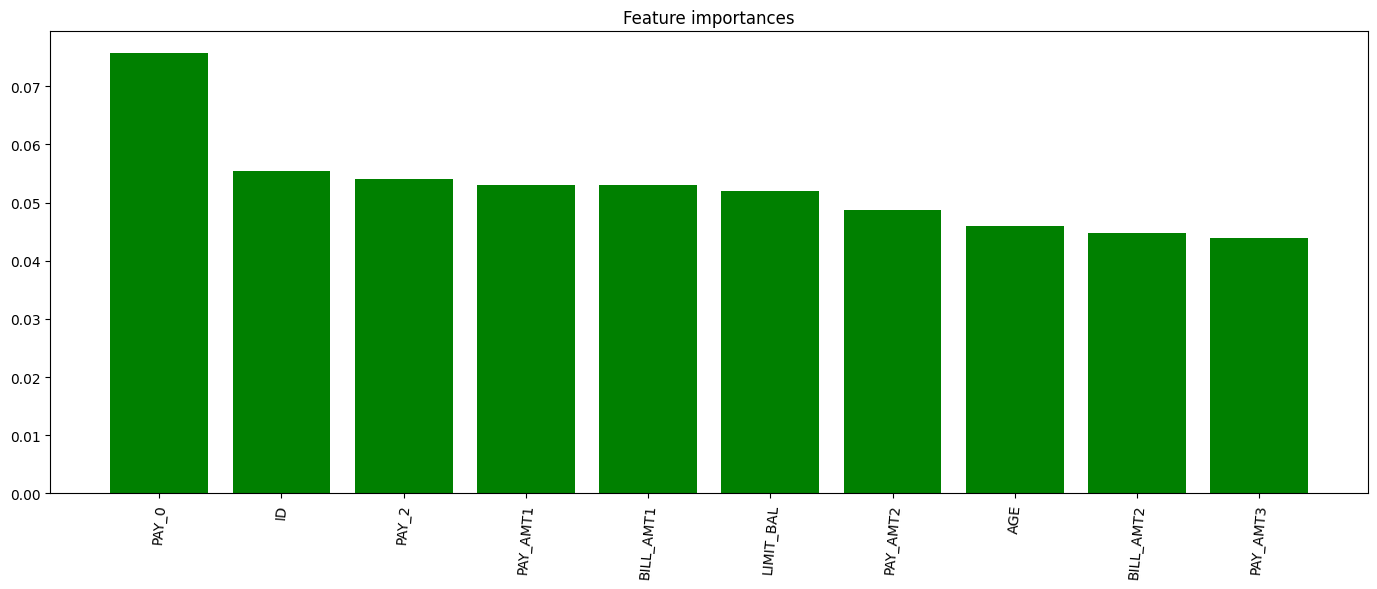

In [122]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]

plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="g",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [124]:
import torch


In [ ]:
model_save_name = 'rf_optimized_classifier.pt'
path = F"/content/drive/MyDrive/Colab Notebooks/{model_save_name}"
torch.save(optimal_rf_clf, path)

In [123]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [125]:
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]
y_preds_proba_rf

array([0.19      , 0.255625  , 0.38      , ..., 0.245     , 0.32536842,
       0.666     ])

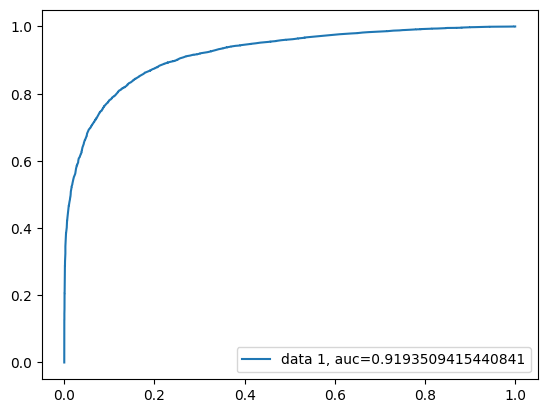

In [164]:
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Applying XGBoost**

* XGBoost is a machine learning algorithm that uses an ensemble of decision trees and gradient boosting to make predictions.

In [127]:
#import lightgbm and xgboost
import lightgbm as lgb
import xgboost as xgb

In [128]:
#The data is stored in a DMatrix object
#label is used to define our outcome variable
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [129]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [130]:
#training our model
num_round=50
from datetime import datetime
start = datetime.now()
xg=xgb.train(parameters,dtrain,num_round)
stop = datetime.now()

[05:15:19] WARNING: ../src/learner.cc:767: 
Parameters: { "silent" } are not used.



In [131]:
#Execution time of the model
execution_time_xgb = stop-start
execution_time_xgb

datetime.timedelta(seconds=4, microseconds=665182)

In [132]:
#now predicting our model on train set
train_class_preds_probs=xg.predict(dtrain)
#now predicting our model on test set
test_class_preds_probs =xg.predict(dtest)

In [133]:
len(train_class_preds_probs)


31307

In [134]:
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [135]:
test_class_preds_probs[:20]

array([0.24242397, 0.2442791 , 0.39225513, 0.21784903, 0.19362365,
       0.24527678, 0.16422307, 0.39431393, 0.53379375, 0.2412661 ,
       0.73363036, 0.3262786 , 0.7584867 , 0.54412836, 0.48056686,
       0.3590129 , 0.961583  , 0.5085926 , 0.31167313, 0.23285575],
      dtype=float32)

In [136]:
test_class_preds[:20]


[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0]

In [137]:
len(y_train)


31307

In [138]:
len(train_class_preds)


31307

In [139]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.8116715111636376
The accuracy on test data is  0.7866545619609623


In [140]:
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.7866545619609623
The precision on test data is  0.7383916990920882
The recall on test data is  0.8172552397358599
The f1 on test data is  0.7758244753338784
The roc_score on train data is  0.7893490864557479


# **Hyperparameter Tuning**

In [141]:
from xgboost import  XGBClassifier


In [142]:
X = df_fr.drop(['IsDefaulter'],axis=1)
y = df_fr['IsDefaulter']

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)


In [144]:
param_test1 = {
'max_depth':range(3,10,2),
'min_child_weight':range(1,6,2)
}

In [145]:
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27),
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0, gpu_id=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=140, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [146]:
 gsearch1.best_score_


0.8316989725526538

In [147]:
optimal_xgb = gsearch1.best_estimator_


In [148]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [149]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.9553773916376529
The accuracy on test data is  0.8440438363270865


In [150]:
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on train data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.8440438363270865
The precision on test data is  0.8149156939040207
The recall on test data is  0.8653078088417573
The f1 on test data is  0.839356088437646
The roc_score on train data is  0.8452151789306827


In [151]:
pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['important_xgb']).sort_values('important_xgb',
                                                                        ascending=False)[:10]

,important_xgb
PAY_2,0.152465
PAY_0,0.140926
MARRIAGE,0.096554
PAY_3,0.091670
SEX,0.073550
PAY_4,0.051001
PAY_5,0.042865
EDUCATION,0.040413
PAY_6,0.032254
PAY_AMT1,0.025266


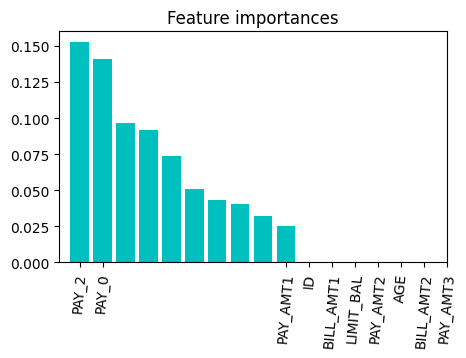

In [152]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

plt.subplots(figsize=(5,3))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="c",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [153]:
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

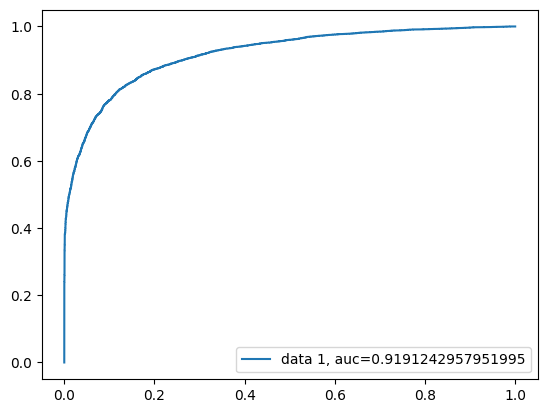

In [154]:
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [155]:
model_save_name = 'xgb_optimized_classifier.pt'
path = F"/content/drive/MyDrive/Colab Notebooks/{model_save_name}"
torch.save(optimal_xgb, path)

In [156]:
model_save_name = 'xgb_optimized_classifier.pt'
path = F"/content/drive/MyDrive/Colab Notebooks/{model_save_name}"
optimal_xgb = torch.load(path)

# **Evaluating the models**

In [157]:
recall_score

<function sklearn.metrics._classification.recall_score(y_true, y_pred, *, labels=None, pos_label=1, average='binary', sample_weight=None, zero_division='warn')>

In [158]:
classifiers = ['Logistic Regression', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr,  test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr, test_f1_score_rf, test_f1_score_xgb_tuned]

In [159]:
pd.DataFrame({'Classifier':classifiers, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.724758,0.724078,0.728664,0.722015,0.725324
1,Random Forest CLf,1.000000,0.842617,0.823217,0.856430,0.839495
2,Xgboost Clf,0.955377,0.844044,0.814916,0.865308,0.839356


# **Plotting ROC AUC for all the models**

In [160]:
classifiers_proba = [(optimized_clf, y_preds_proba_lr),
               (optimal_rf_clf, y_preds_proba_rf),
               (optimal_xgb, y_preds_proba_xgb)]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:

    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])

    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr,
                                        'tpr':tpr,
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [161]:
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.00012968486577616392, 0.0001...","[0.0, 0.00012970168612191958, 0.00064850843060...",0.796287
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.00012968...","[0.0, 0.018158236057068743, 0.0184176394293125...",0.919351
XGBClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.00012970168612191958, 0.00505836575875...",0.919124


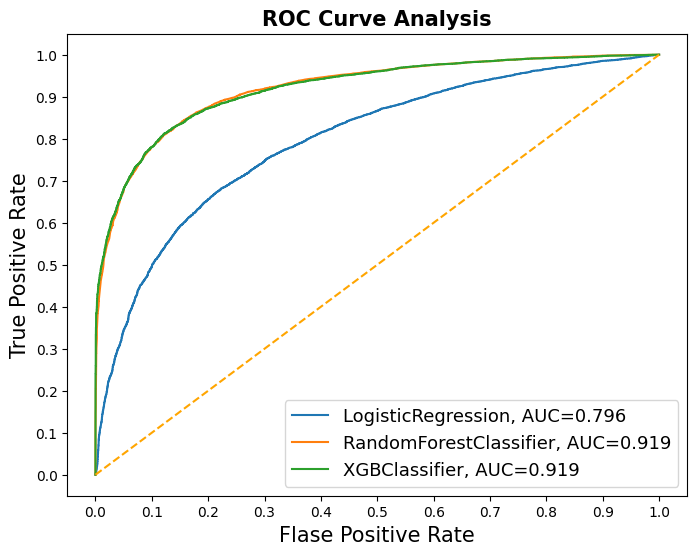

In [162]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'],
             result_table.loc[i]['tpr'],
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))

plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# **Conclusion**

## **Business**

* Previous payments by clients are crucial in assessing client credibility and determining credit limits.
* Married individuals are seen as more responsible and may be considered for higher credit limits.
* Billing amount is linked to the payment behavior of clients; when within limits, they tend to pay on time.
* People in the age group of 30 to 40 tend to spend more, making them a target for increased revenues.

## **Model Implementation**

- The extreme boost model outperforms the other models.
- Optimizer models utilizing hybrid parameters from grid search CV perform as expected and improve results.
- Models using SMOTE functions also yield better results as anticipated.
- Combining two good models does not necessarily result in a better model, suggesting a single model may suffice for the project.
- Overfitting is observed when no validation is implemented, highlighting the need for validation.
- Future work may involve experimenting with random search for parameter selection, using linear regression for assigning ensemble model weights, and comparing models using different metrics.